In [3]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt

In [4]:
from src.nbody.main import NBodySimulation

In [10]:
path_ics = "./ics/sun.hdf5" #initial conditions file

Here we are going to explore how the IC file data is structured. The code below shows that the file contains two data groups: 

1. `Bodies`: containing the `Masses`, `Positions` and `Velocities` of the particles.     
2. `Header`: which looks like it is empty. But you see that it has metadata about the simulation such as the number of `Dimensions` (=3) as well as the number of particles `N`(=1 as it is only the Sun at the moment).

### Q1: Can you figure out the shape and values stored in the datasets that are in the `Bodies` group? Do they make sense? What units do you think they are in?

In [11]:
with h5.File(path_ics, "r") as hf:
    
    print(hf.keys())
    
    for key in hf.keys():
        print(key, hf[key].keys())
    
    for key in hf.keys():
        print(list(hf[key].attrs))
    
    for key in hf.keys():
        for attr in hf[key].attrs:
            print(hf[key].attrs[attr])

<KeysViewHDF5 ['Bodies', 'Header']>
Bodies <KeysViewHDF5 ['Masses', 'Positions', 'Velocities']>
Header <KeysViewHDF5 []>
[]
['Dimensions', 'N']
3
1


In [12]:
output_folder = "./outputs/"

This is the Newton's gravitational constant. But it seems to be in a different unit system from the SI!

### Q2: Figure out the units of G. Using the units that you have from Q1, derive this value for the G. Can you think of a reason why we are setting up our simulation in these units? Justify your answer with an order-of-magnitude problem. (you might need to lookup `integer overflow errors`)

In [13]:
G = 4.30091e-6

HDF5 file to store our simulation output. Remember to rename as you run different simulations so that the file does not get over-written!

In [14]:
path_output = output_folder + 'output.hdf5'

Here we set-up parameters related to the numerical accuracy of our simulations:
1. `e`: the softening length
2. `dt`: timestep $\Delta t$ for integrating the orbits.

### Q3: What is the physical value of `e`? 

In [15]:
e = 0.01 # softening length. 
dt = 5e-4 #time step.

`T` is the total simulation time. But we still haven't figured out the internal unit for time in our simulations.

### Q4: Figure out the internal unit of time in our simulations.

`num_snaphots` is the number of outputs that we want to save to our output file. **Note**: This is not the same as the number of time steps in our simulations.

### Q5: How many timesteps do you expect for your simulation parameters?

In [16]:
T = 2
num_snapshots = 600

In [17]:

Sim = NBodySimulation(path_ics, path_output)

Sim.set_time(T, dt, snapshots=num_snapshots)
# Sim.set_time_NFW_off(0.4)  # Turn off  the NFW profile at approx t=1.25

# Sim.set_integrator("RK4")
Sim.set_integrator("Euler")
Sim.set_integrator("Symplectic")

# Sim.estimate_runtime(num_steps=3)  # TODO: bugs out for RK4.
Sim.run_simulation(e=e, G=G)

100.00%
Elapsed time: 0.72 s


In [18]:
POS_R, VEL_R, MASS, TIME = Sim.get_output()

### Q6: Explore the shapes of these variables. As an example, the one for POS_R has been done for you below.

In [19]:
POS_R.shape

(600, 1, 3)

In [20]:
POS_R = POS_R.reshape(600, 3)

VEL_R = VEL_R.reshape(600, 3)

### Q7: Plot the orbit of the Sun about the center of the Milky Way. Remember to label your axes.

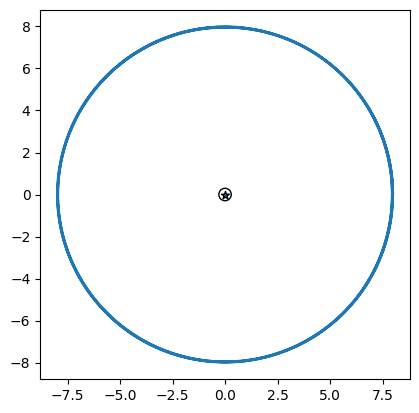

In [21]:
fig, ax = plt.subplots()
ax.plot(POS_R[:,0], POS_R[:,1])
ax.scatter(0, 0, facecolors='none', edgecolors='black', s=80)
ax.scatter(0, 0, marker="*", edgecolors='black', s=35)
ax.set_aspect("equal")

### Q8: Plot the variation of the distance of the Sun from the center of the Milky Way.

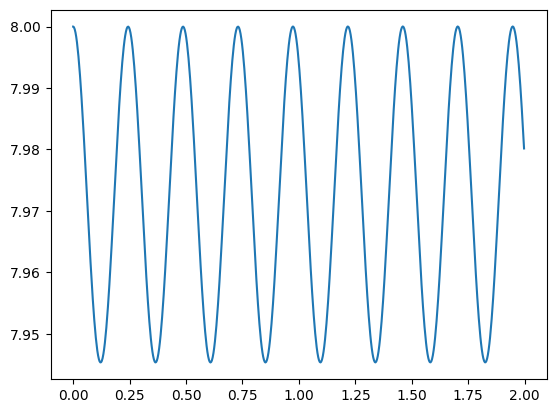

In [22]:
r = np.sqrt(POS_R[:,0]**2 + POS_R[:,1]**2)
fig, ax = plt.subplots()
ax.plot(TIME, r)

### Q9: Plot the variation of the speed of the Sun about the center of the Milky Way.

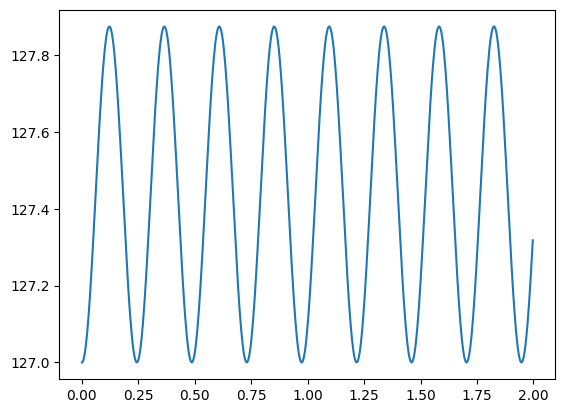

In [23]:
r = np.sqrt(VEL_R[:,0]**2 + VEL_R[:,1]**2)
fig, ax = plt.subplots()
ax.plot(TIME, r)

## Q10: Now do the same analyses for the other methods (`Euler` & `Symplectic`). Compare and contrast these methods and their accuracy. You can plot them all in the same plot if you want to. 

## Q11: Also keep track of how long the simulations take to run. Can you explain why we simulators would prefer `Symplectic` integration methods?

## Q12: You should also explore different values for softening `e` and the timestep `dt`.